# Pymaceuticals Inc.
---

### Analysis

- Our mice testing population was pretty evenly split between male (50.4%) and female (49.6%) mice. We collected the largest amount of data on Capomulin and Ramicane at ~230 data points each compared to ~150-180 data points for the remaining treatments
- Based on the box plots of final tumor volume, Capomulin and Ramicane perform similarly at limiting tumor growth over time, and are more effective than Infubinol and Ceftamin
- There is a strong, positive correlation between(0.84) between mouse weight and average tumor volume on Capomulin, indicating that mice weigh more when they have larger tumors

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
mice_count = df['Mouse ID'].nunique()
print(mice_count)

249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df_grouped = df.groupby(['Mouse ID','Timepoint']).size()
df_duplicates = df_grouped[df_grouped >1].index.get_level_values('Mouse ID').unique()
df_duplicates

Index(['g989'], dtype='object', name='Mouse ID')

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
df_g989 = df.loc[df['Mouse ID'] == 'g989']
df_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df[df['Mouse ID'] != 'g989']
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = df_clean['Mouse ID'].nunique()
mice_count2

248

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = df_clean.groupby('Drug Regimen')
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_variance = summary_df['Tumor Volume (mm3)'].var()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sterr = summary_df['Tumor Volume (mm3)'].apply(lambda x: sem(x))

summary_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                           'Median Tumor Volume': tumor_median,
                           'Tumor Volume Variance': tumor_variance,
                           'Tumor Volume Std. Dev.': tumor_stdev,
                           'Tumor Volume Std. Err.': tumor_sterr})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = df.groupby('Drug Regimen').agg(
    tumor_mean=('Tumor Volume (mm3)','mean'),
    tumor_median = ('Tumor Volume (mm3)','median'),
    tumor_variance=('Tumor Volume (mm3)','var'),
    tumor_stdev=('Tumor Volume (mm3)','std'),
    tumor_sterr=('Tumor Volume (mm3)', lambda x: sem(x)))
summary_df2

,tumor_mean,tumor_median,tumor_variance,tumor_stdev,tumor_sterr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

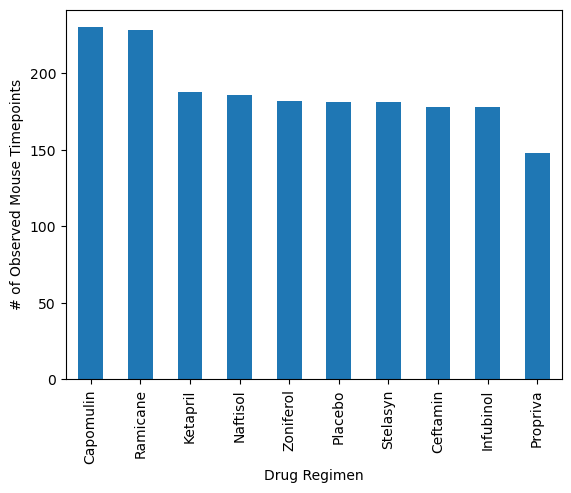

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_df = df_clean.groupby('Drug Regimen').size()
sorted_regimen_df = regimen_df.sort_values(ascending=False)
sorted_regimen_df.plot(kind='bar')

plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

plt.show()

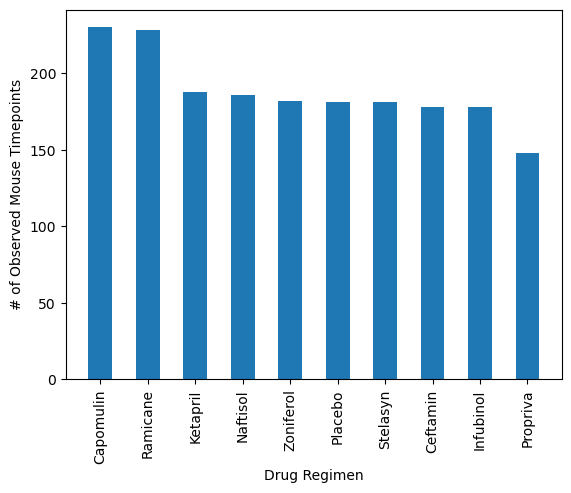

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_df = df_clean.groupby('Drug Regimen').size()
sorted_regimen_df = regimen_df.sort_values(ascending=False)

sorted_regimen_names = sorted_regimen_df.index
sorted_regimen_rows = sorted_regimen_df.values

x_axis = np.arange(0,len(sorted_regimen_names))

plt.bar(x_axis,sorted_regimen_rows, width=0.5)

plt.xticks(x_axis, sorted_regimen_names, rotation=90)

plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')


plt.show()

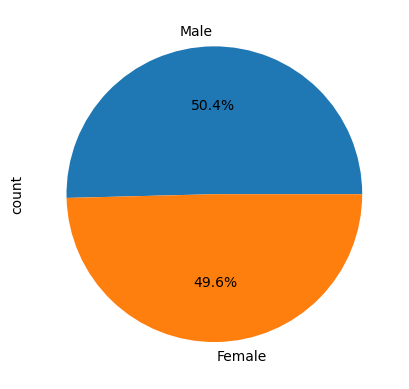

In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = df_clean.drop_duplicates(subset='Mouse ID', keep='first').groupby('Sex').size()
gender_df_sorted = gender_df.sort_values(ascending=False)

# Make the pie chart
gender_df_sorted.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('count')

plt.show()

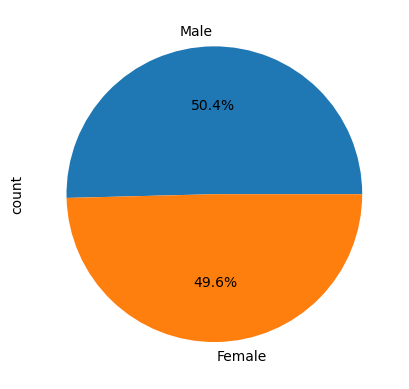

In [20]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = df_clean.drop_duplicates(subset='Mouse ID', keep='first').groupby('Sex').size()
gender_df_sorted = gender_df.sort_values(ascending=False)

# Make the pie chart
labels = gender_df_sorted.index
counts = gender_df_sorted.values

plt.pie(counts, labels=labels, autopct = '%1.1f%%')
plt.ylabel('count')

plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_df = df_clean.loc[df_clean['Drug Regimen'].isin(regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(last_timepoint, df_clean, on=['Drug Regimen', 'Mouse ID', 'Timepoint'])


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []
tumor_volumes_by_treatment = {treatment: [] for treatment in treatments}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    treatment_df = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]
    
    Q1 = treatment_df['Tumor Volume (mm3)'].quantile(0.25)
    Q3 = treatment_df['Tumor Volume (mm3)'].quantile(0.75)

    IQR = Q3-Q1
    
    outlier_high = Q3 + (1.5*IQR)
    outlier_low = Q1 - (1.5*IQR)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes_by_treatment[treatment] = treatment_df['Tumor Volume (mm3)'].tolist()
    
    # add subset
    final_tumor_volume.extend(treatment_df['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    treatment_outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] > outlier_high) | 
                                      (treatment_df['Tumor Volume (mm3)'] < outlier_low)]

    print(f"{treatment}'s Potential Outliers: {treatment_outliers['Tumor Volume (mm3)'].tolist()}")

Capomulin's Potential Outliers: []
Ramicane's Potential Outliers: []
Infubinol's Potential Outliers: [36.3213458]
Ceftamin's Potential Outliers: []


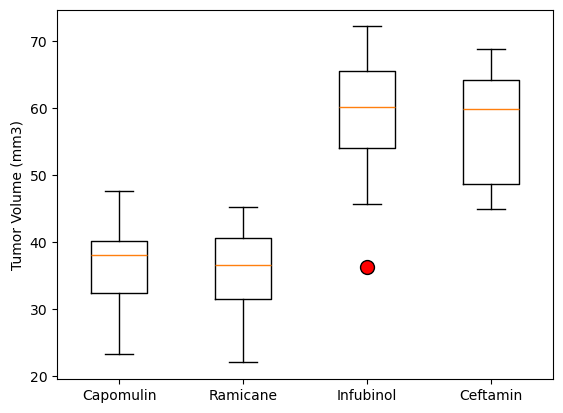

In [23]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

data = [tumor_volumes_by_treatment[treatment] for treatment in treatments]
flierprops = dict(marker='o',markerfacecolor='red',markersize=10)

plt.boxplot(data, tick_labels=treatments, flierprops=flierprops)
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

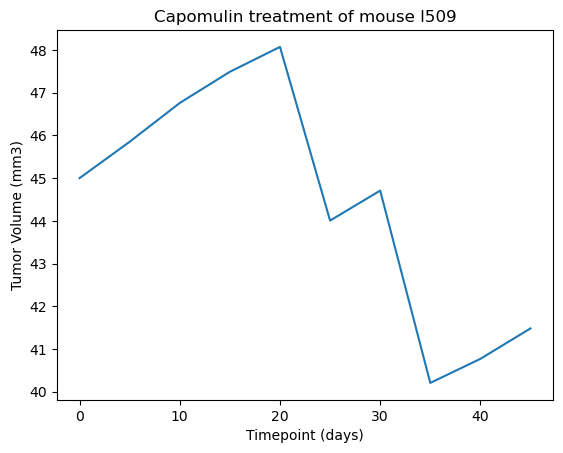

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df = df_clean[df_clean['Mouse ID'] == 'l509']
mouse_capomulin_df = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']

plt.plot(mouse_capomulin_df['Timepoint'], mouse_capomulin_df['Tumor Volume (mm3)'], linestyle='-')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

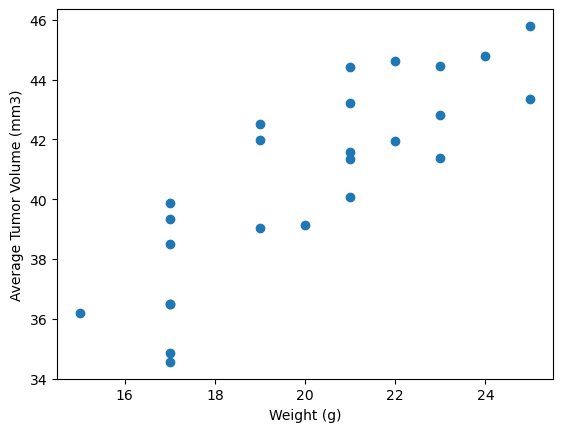

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_df = df_clean[df_clean['Drug Regimen'] == 'Capomulin']

avg_by_weight = capomulin_df.groupby(['Weight (g)','Mouse ID']).agg(tumor_means=('Tumor Volume (mm3)','mean')).reset_index()
x_values = avg_by_weight['Weight (g)']
y_values = avg_by_weight['tumor_means']

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


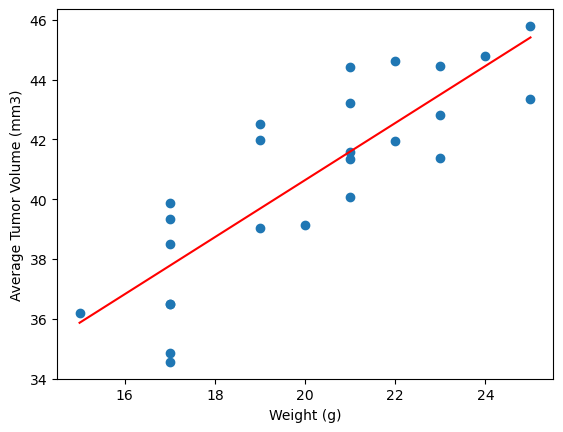

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()